<a href="https://colab.research.google.com/github/Juanisazalu/TRABAJO-2/blob/main/TRABAJO%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

from kneed import KneeLocator

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis

from factor_analyzer import FactorAnalyzer





# EXPLORACION DE DATOS

In [473]:
tabla=pd.read_csv("CC GENERAL.csv")

En el conjunto de datos proporcionado, cada variable representa diferentes aspectos del comportamiento de los titulares de tarjetas de crédito. A continuación, te proporciono una interpretación de cada una de las variables:

CUST_ID (Identificación de Titular de Tarjeta de Crédito): Esta variable es una identificación única o código para cada titular de una tarjeta de crédito. Es una variable categórica que se utiliza para distinguir a los titulares de tarjetas de crédito en el conjunto de datos.

BALANCE (Saldo): Esta variable indica la cantidad de dinero que un titular de tarjeta de crédito tiene disponible en su cuenta para realizar compras. Es una medida del saldo actual en la cuenta del titular.

BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Representa la frecuencia con la que el saldo de la cuenta se actualiza, con un puntaje que varía entre 0 y 1. Un puntaje de 1 significa que el saldo se actualiza con frecuencia, mientras que un puntaje de 0 indica que el saldo no se actualiza con frecuencia.

PURCHASES (Compras): Indica el monto total de las compras realizadas desde la cuenta de la tarjeta de crédito durante un período de tiempo.

ONEOFF_PURCHASES (Compras en un Solo Pago): Representa el monto máximo gastado en una sola compra.

INSTALLMENTS_PURCHASES (Compras en Cuotas): Indica la cantidad de compras realizadas en cuotas o a plazos.

CASH_ADVANCE (Avance de Efectivo): Muestra la cantidad de dinero en efectivo solicitada o retirada por el titular de la tarjeta de crédito.

PURCHASES_FREQUENCY (Frecuencia de Compras): Representa la frecuencia con la que se realizan compras, con un puntaje entre 0 y 1. Un puntaje de 1 indica que las compras se realizan con frecuencia.

ONEOFFPURCHASESFREQUENCY (Frecuencia de Compras en un Solo Pago): Indica con qué frecuencia se realizan compras en un solo pago.

PURCHASESINSTALLMENTSFREQUENCY (Frecuencia de Compras a Plazos): Muestra la frecuencia de las compras a plazos.

CASHADVANCEFREQUENCY (Frecuencia de Avances de Efectivo): Indica la frecuencia con la que se realizan avances de efectivo.

CASHADVANCETRX (Número de Transacciones de Avance de Efectivo): Representa el número de transacciones realizadas con avances de efectivo.

PURCHASES_TRX (Número de Transacciones de Compras): Indica el número de transacciones de compra realizadas.

CREDIT_LIMIT (Límite de Crédito): Representa el límite de crédito otorgado al titular de la tarjeta de crédito.

PAYMENTS (Pagos): Muestra la cantidad total de pagos realizados por el titular de la tarjeta de crédito.

MINIMUM_PAYMENTS (Pagos Mínimos): Indica la cantidad mínima de pagos que el titular de la tarjeta de crédito está obligado a realizar.

PRCFULLPAYMENT (Porcentaje de Pago Total): Representa el porcentaje del pago total realizado por el titular de la tarjeta de crédito.

TENURE (Duración de la Tenencia): Indica la duración o antigüedad del servicio de la tarjeta de crédito para el titular de la tarjeta.

Estas variables proporcionan información sobre el comportamiento financiero y el uso de la tarjeta de crédito por parte de los titulares, lo que puede ser útil para segmentar a los clientes y desarrollar estrategias de marketing dirigidas a grupos específicos.

Renombrar nombre de variables

In [474]:
tabla=tabla.rename(columns={"CUST_ID":"id","BALANCE":"saldo","BALANCE_FREQUENCY":"frecuenciaactsaldo","PURCHASES":"comprastotales","ONEOFF_PURCHASES":"montomaxcomprado","INSTALLMENTS_PURCHASES":"montoacuotas","CASH_ADVANCE":"anticipoefectivo","PURCHASES_FREQUENCY":"frecuenciacompras","ONEOFF_PURCHASES_FREQUENCY":"freccomprasunavez","PURCHASES_INSTALLMENTS_FREQUENCY":"freccomprasplazo","CASH_ADVANCE_FREQUENCY":"frecpagoantefectivo","CASH_ADVANCE_TRX":"ntranscashinadv","PURCHASES_TRX":"ntransacciones","CREDIT_LIMIT":"limtarjetacredito","PAYMENTS":"pagos","MINIMUM_PAYMENTS":"montominpagos","PRC_FULL_PAYMENT":"%totalpagado","TENURE":"antiguedad"})                                                                                            
tabla

,id,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,antiguedad
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [475]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8950 non-null   object 
 1   saldo                8950 non-null   float64
 2   frecuenciaactsaldo   8950 non-null   float64
 3   comprastotales       8950 non-null   float64
 4   montomaxcomprado     8950 non-null   float64
 5   montoacuotas         8950 non-null   float64
 6   anticipoefectivo     8950 non-null   float64
 7   frecuenciacompras    8950 non-null   float64
 8   freccomprasunavez    8950 non-null   float64
 9   freccomprasplazo     8950 non-null   float64
 10  frecpagoantefectivo  8950 non-null   float64
 11  ntranscashinadv      8950 non-null   int64  
 12  ntransacciones       8950 non-null   int64  
 13  limtarjetacredito    8949 non-null   float64
 14  pagos                8950 non-null   float64
 15  montominpagos        8637 non-null   f

Se elimina la variable ID

In [476]:
tabla.drop("id",axis=1,inplace=True)

## EDA

In [478]:
tabla.isnull().sum()

saldo                    0
frecuenciaactsaldo       0
comprastotales           0
montomaxcomprado         0
montoacuotas             0
anticipoefectivo         0
frecuenciacompras        0
freccomprasunavez        0
freccomprasplazo         0
frecpagoantefectivo      0
ntranscashinadv          0
ntransacciones           0
limtarjetacredito        1
pagos                    0
montominpagos          313
%totalpagado             0
antiguedad               0
dtype: int64

Relleno de nulos

Buscamos la distribucion de la variable montominpagos para llenar adecuadamente los nulos

{'whiskers': [<matplotlib.lines.Line2D at 0x1e760c0e8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e762a57e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e760c0ead0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e768bf7370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e768bf67a0>],
 'means': []}

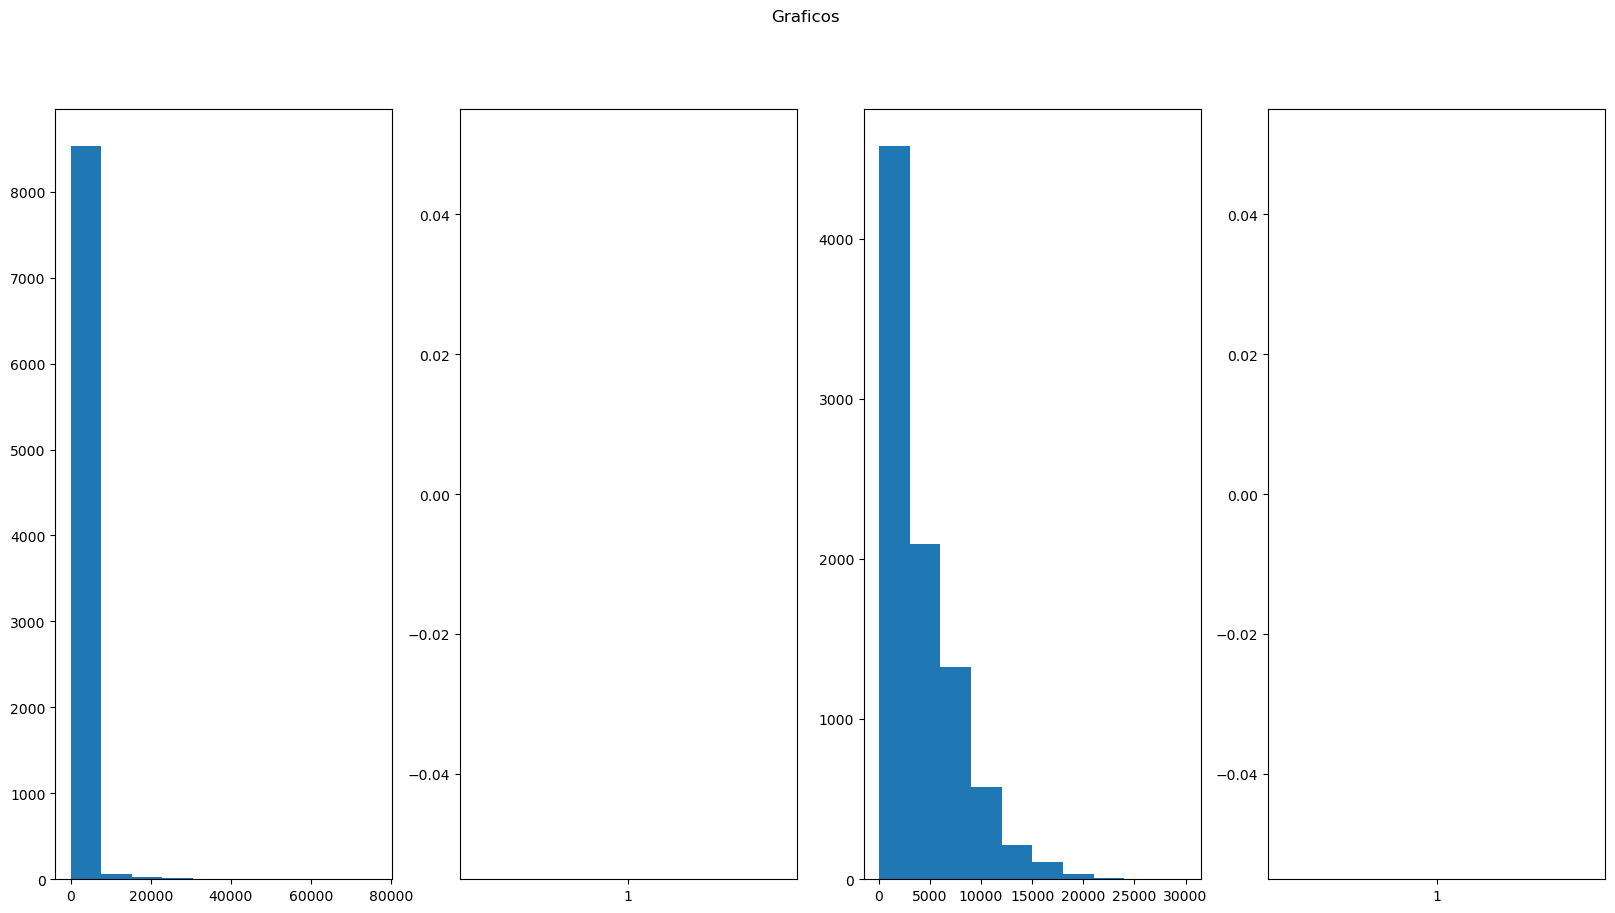

In [187]:
fig, ax= plt.subplots(figsize=(20,10), nrows=1, ncols=4)
fig.suptitle("Graficos")
ax[0].hist(tabla["montominpagos"])
ax[1].boxplot(tabla["montominpagos"]) 
ax[2].hist(tabla["limtarjetacredito"]) 
ax[3].boxplot(tabla["limtarjetacredito"]) 

Relleno de nulos con la media en ambas variables

In [479]:
tabla.fillna(tabla.mean(),inplace=True)
tabla.isnull().sum()


saldo                  0
frecuenciaactsaldo     0
comprastotales         0
montomaxcomprado       0
montoacuotas           0
anticipoefectivo       0
frecuenciacompras      0
freccomprasunavez      0
freccomprasplazo       0
frecpagoantefectivo    0
ntranscashinadv        0
ntransacciones         0
limtarjetacredito      0
pagos                  0
montominpagos          0
%totalpagado           0
antiguedad             0
dtype: int64

Como se observa en la distribucion, la variable no sigue una distribucion, por lo tanto se llenara con

<Axes: >

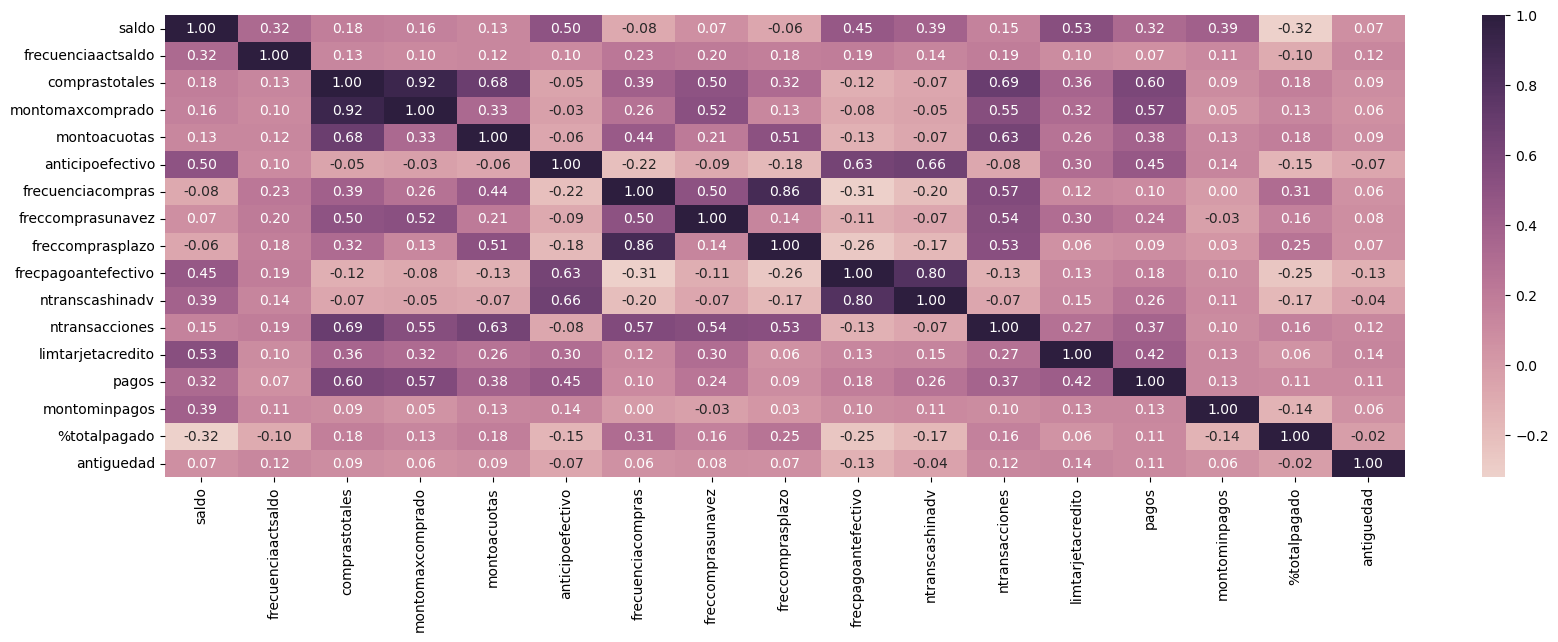

In [480]:
figure(figsize=(20,6))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

hacer analisis de variables que se correlacionen

In [11]:
len(tabla.columns)

17

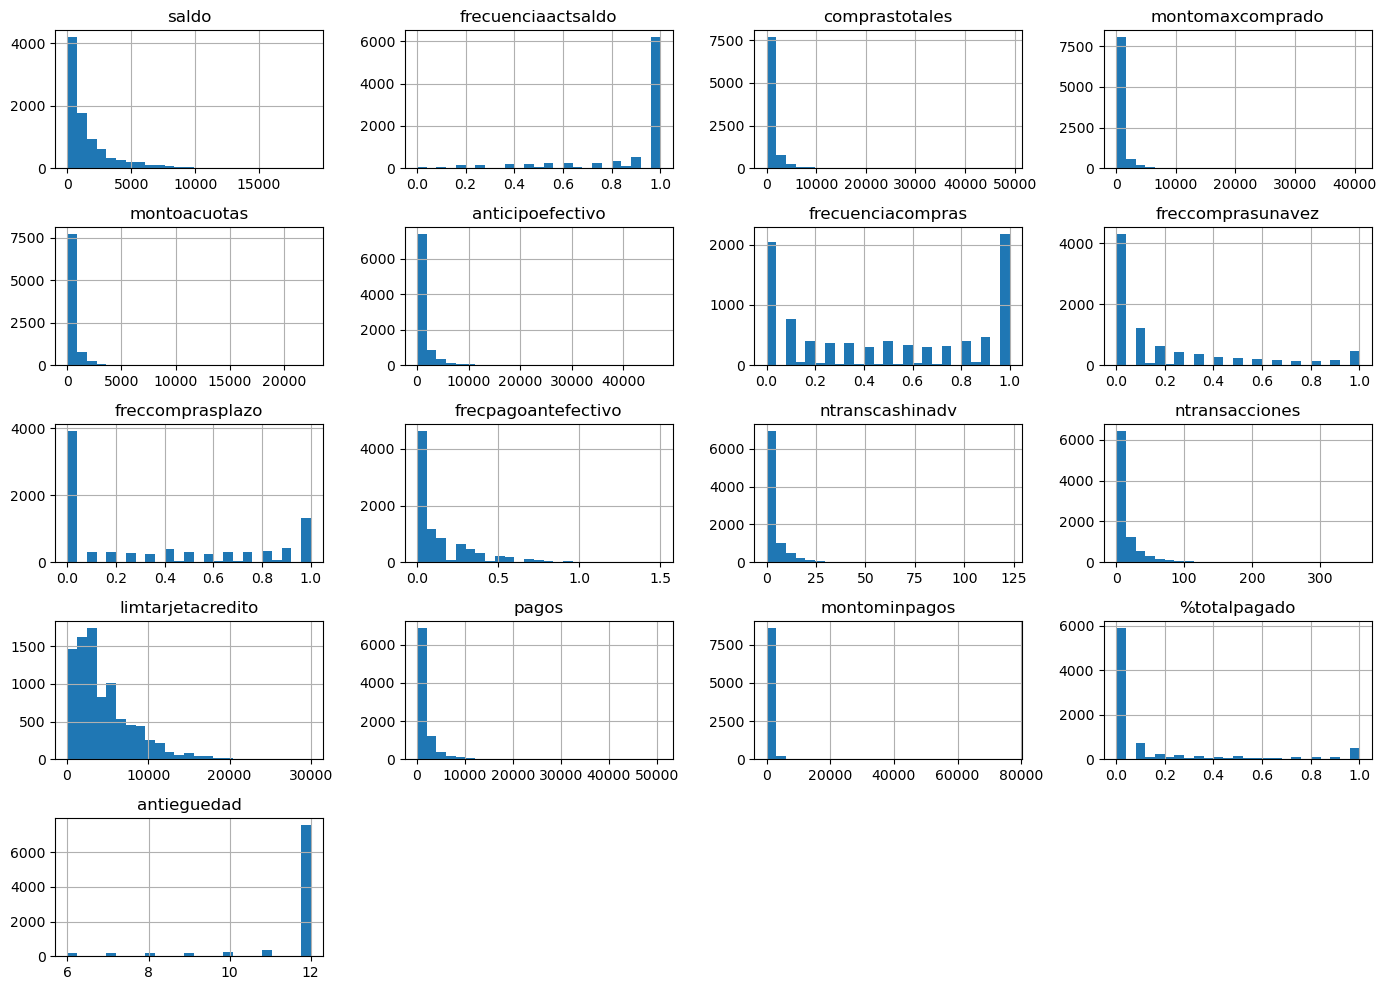

In [12]:
tabla.hist(figsize=(14,10), bins=25)
plt.tight_layout()
plt.show()

Escalado de variables

In [481]:
scaler = StandardScaler()
scaled_tabla=pd.DataFrame(scaler.fit_transform(tabla),columns=tabla.columns)
scaled_tabla


,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,antiguedad
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In [482]:
tabla["antiguedad"].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [207]:
scaled_tabla["antiguedad"].unique()

array([ 0.36067954, -2.6282852 , -0.38656164, -1.88104401, -1.13380283,
       -3.37552638, -4.12276757])

## Tratamiendo de valares atipicos

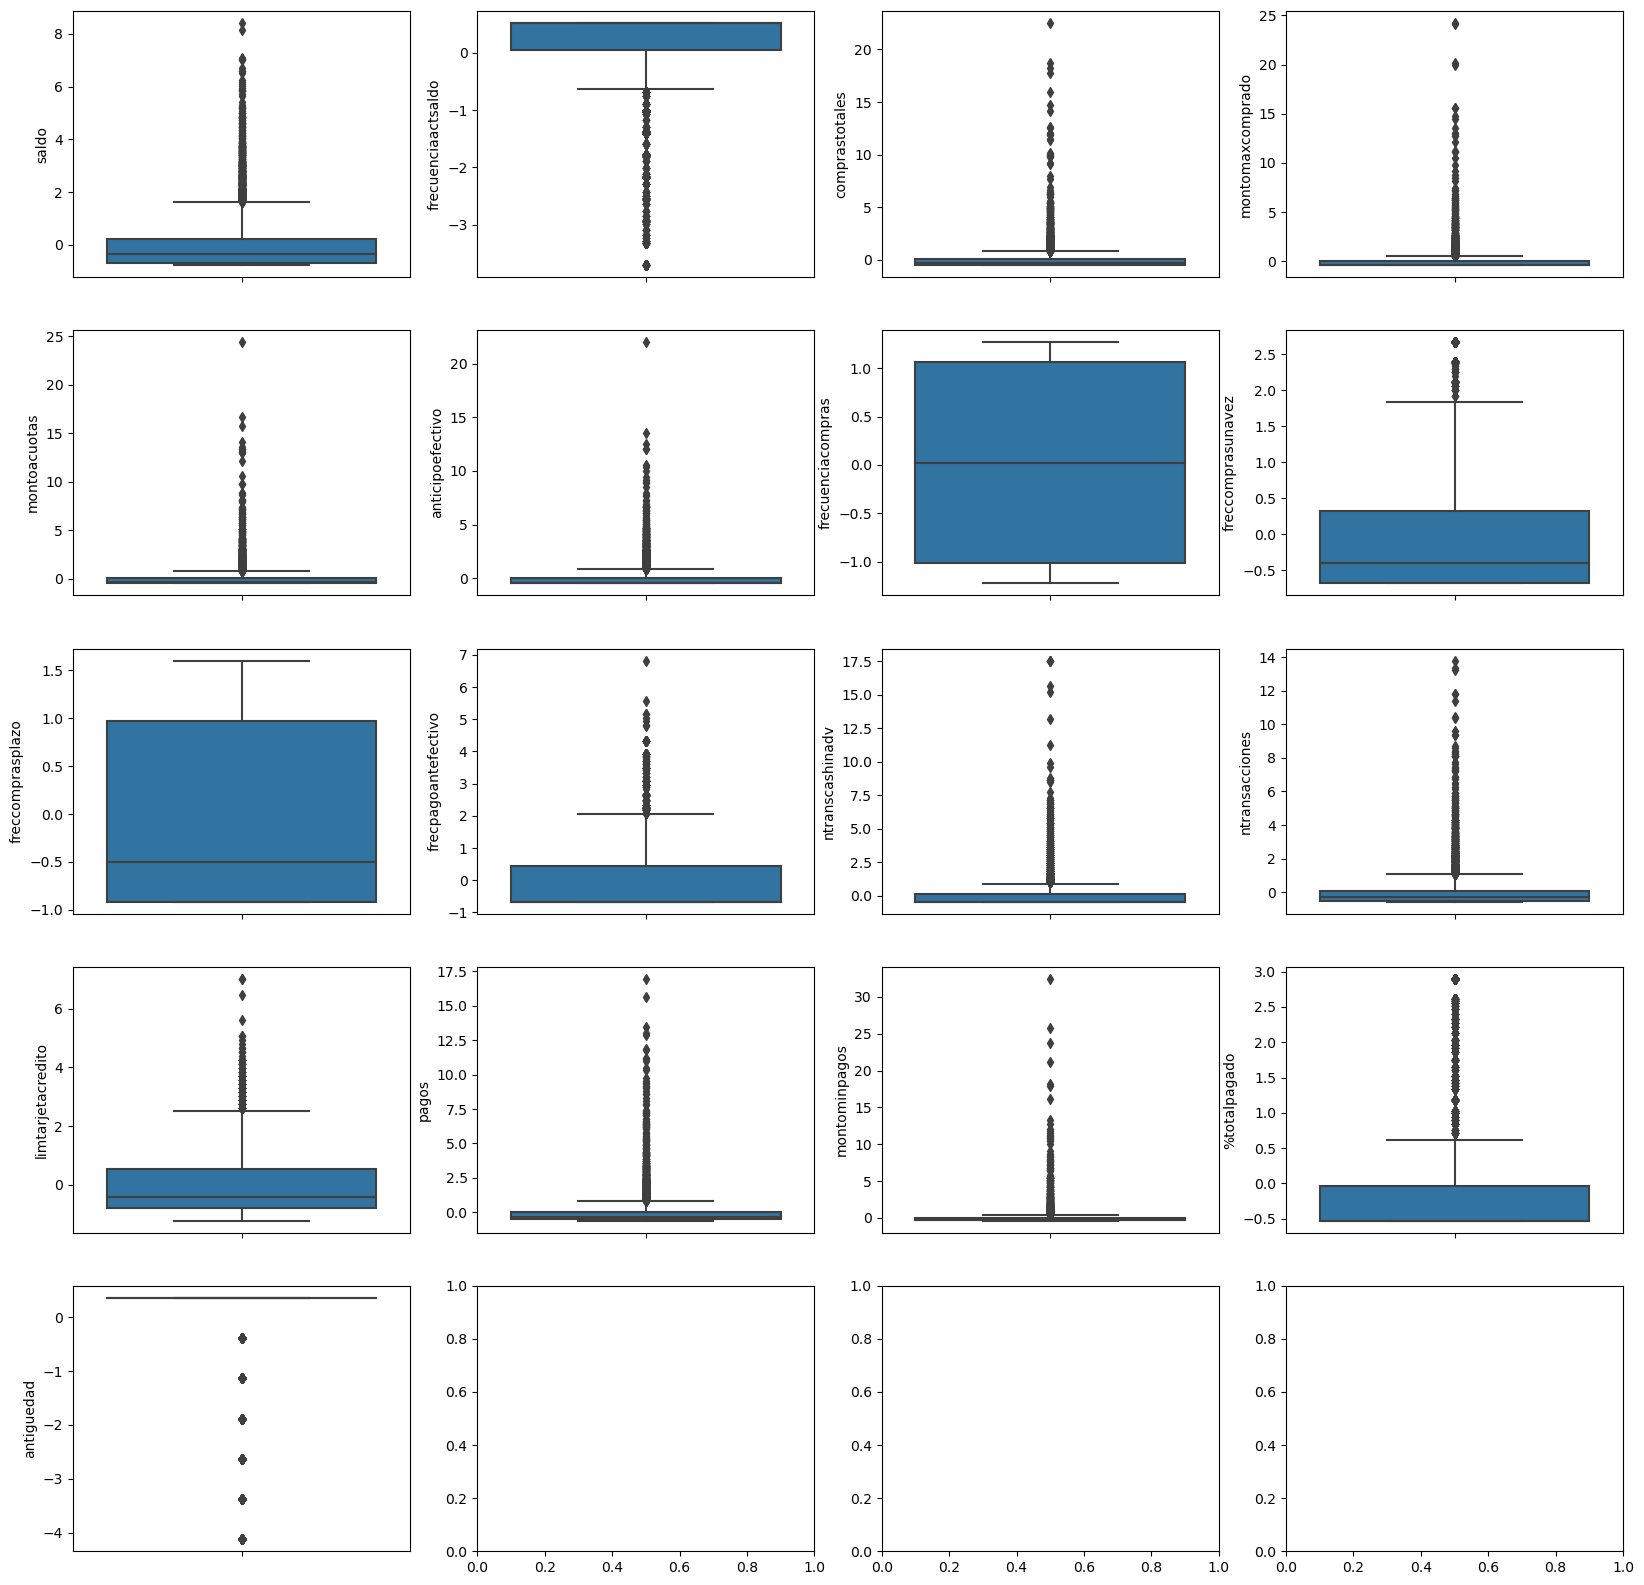

In [432]:
# Tratamiento de valores atípicos
train_tabla = scaled_tabla.copy()

# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=5,figsize=(20,20))

for idx,i in enumerate(train_tabla.columns):
    sns.boxplot(y=train_tabla[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

Imputacion de valores atipicos

In [483]:
# Definición de función que utiliza RIC para la detección de valores atípicos
def outlier_IQR(df, column, thr): #thr es para eliiminar los valores que esten por fuera del 1.5 veces el rango intercuartilico
    Q1 = np.quantile(df[column], 0.25) # first quartile
    Q3 = np.quantile(df[column], 0.75) # third quartile
    IQR = Q3 - Q1 # inter - quartile range
    threshold = thr * IQR # defining the threshold
    lower = Q1 - threshold
    upper = Q3 + threshold
    lower_bound = df[df[column] < lower]
    upper_bound = df[df[column] > upper]

    #Imprimir IQR, threshold, lower bound, upper bound and total number of outlier
    #print('IQR is:', IQR)
    #print('Threshold is:', threshold)
    #print('Lower bound is:', lower)
    #print('Upper bound is:', upper)
    #print('total number of outliers are:', lower_bound.shape[0] + upper_bound.shape[0])
    return upper, lower

In [484]:
frecuencia_valores = scaled_tabla['antiguedad'].value_counts()
print(frecuencia_valores)


 0.360680    7584
-0.386562     365
-1.133803     236
-4.122768     204
-2.628285     196
-3.375526     190
-1.881044     175
Name: antiguedad, dtype: int64


In [485]:

train_tabla=scaled_tabla
listupper = []
listlower = []
i=0
listar=[3.5,7.0,4.5,4.5,3.5,5.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,7.0,3.5]
for feature_name in train_tabla.columns:
    upper, lower = outlier_IQR(train_tabla, feature_name, thr=listar[i] )
    listupper.append(upper)
    listlower.append(lower)
    i+=1
limites = pd.DataFrame({'Upper_Limit': listupper, 'Lower_Limit': listlower})
limites

# Ahora tienes un DataFrame 'limites' con los límites superior e inferior para cada columna en train_tabla

,Upper_Limit,Lower_Limit
0,3.473679,-3.928430
1,3.801357,-3.234228
2,2.304759,-2.705713
3,1.556391,-1.922382
4,1.877501,-2.268414
5,2.985611,-3.388044
6,8.329387,-8.281302
7,3.846690,-4.198378
8,7.575161,-7.522005
9,4.321892,-4.562092


In [457]:
limites

,Upper_Limit,Lower_Limit
0,3.473679,-3.928430
1,3.801357,-3.234228
2,2.304759,-2.705713
3,1.556391,-1.922382
4,1.877501,-2.268414
5,2.985611,-3.388044
6,8.329387,-8.281302
7,3.846690,-4.198378
8,7.575161,-7.522005
9,4.321892,-4.562092


In [487]:
train=train_tabla
tamañoantes = []
tamañodespues = []
i = 0
for feature_name, feature_array in train.items():
    tamañoantes.append(train.shape[0])
    train = train[(train[feature_name] <= limites['Upper_Limit'][i]) & (train[feature_name] >= limites['Lower_Limit'][i])]
    tamañodespues.append(train.shape[0])
    i += 1
valoreseliminados = pd.DataFrame({'tamaño_inicial': tamañoantes, 'tamaño_final': tamañodespues})
valoreseliminados
valoreseliminados.set_index(train.columns,inplace=True)
valoreseliminados["valoreseliminados"]=valoreseliminados["tamaño_inicial"]-valoreseliminados["tamaño_final"]
display(valoreseliminados)
display("filas totales eliminadas", valoreseliminados["valoreseliminados"].sum())


,tamaño_inicial,tamaño_final,valoreseliminados
saldo,8950,8826,124
frecuenciaactsaldo,8826,8666,160
comprastotales,8666,8485,181
montomaxcomprado,8485,8316,169
montoacuotas,8316,8124,192
anticipoefectivo,8124,7977,147
frecuenciacompras,7977,7977,0
freccomprasunavez,7977,7977,0
freccomprasplazo,7977,7977,0
frecpagoantefectivo,7977,7956,21


'filas totales eliminadas'

2749

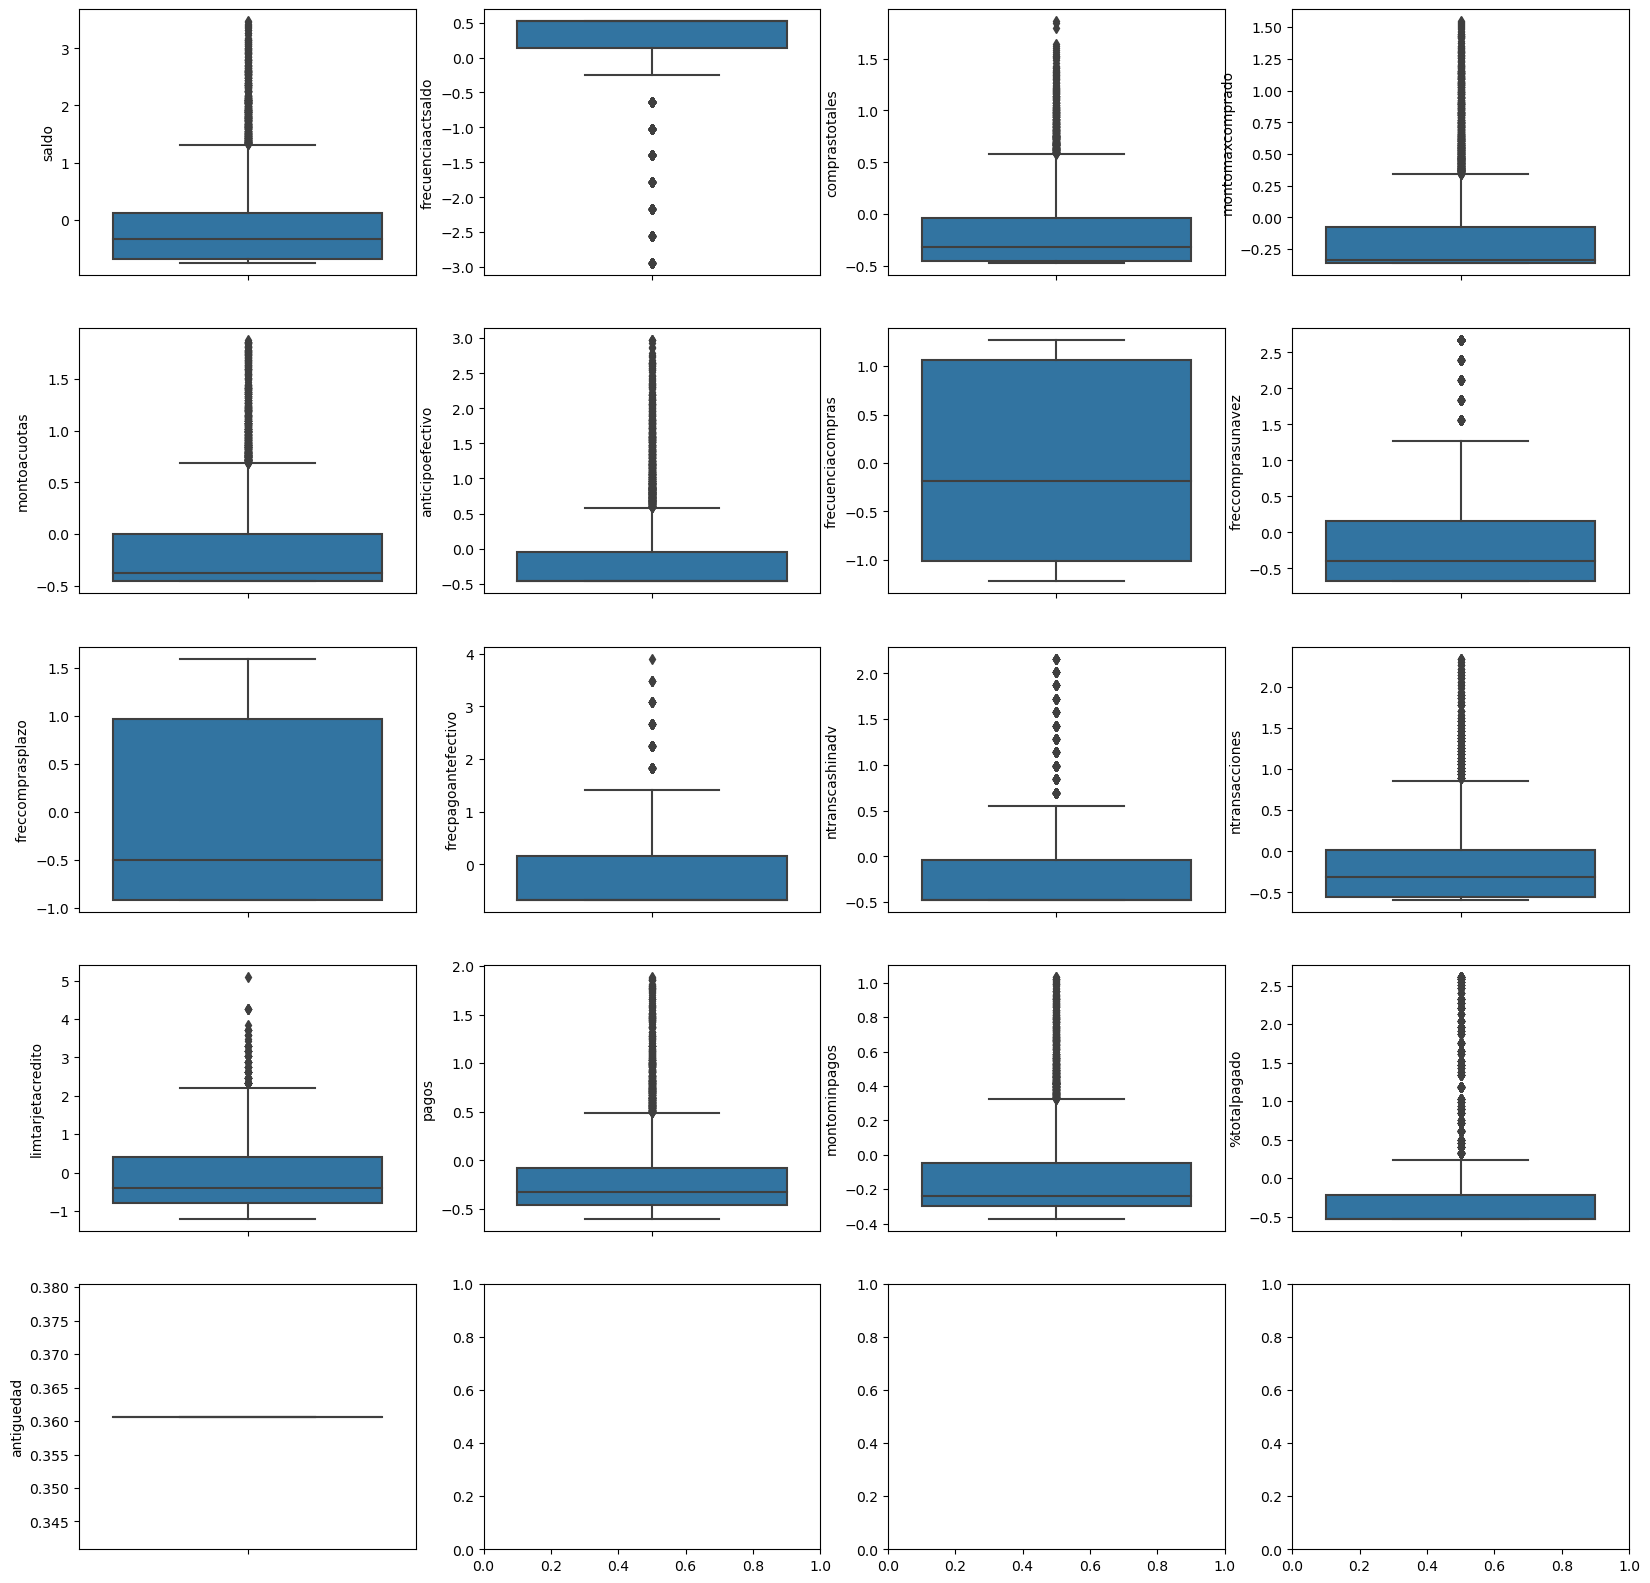

In [290]:
# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=5,figsize=(20,20))

for idx,i in enumerate(train.columns):
    sns.boxplot(y=train[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

# MODELO 1

## Metodo del codo

In [488]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


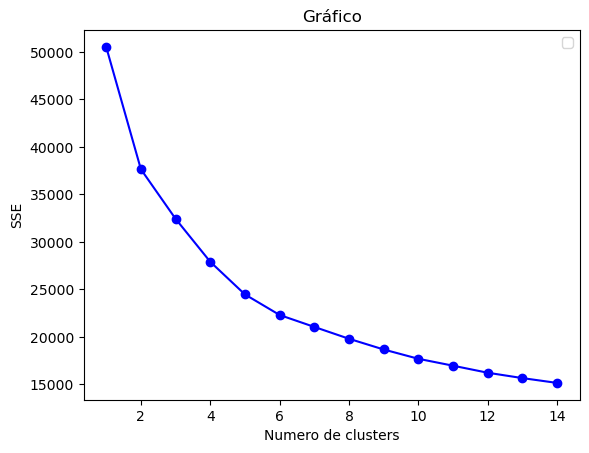

In [489]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

## Coeficiente de silueta

In [490]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  score = silhouette_score(train, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


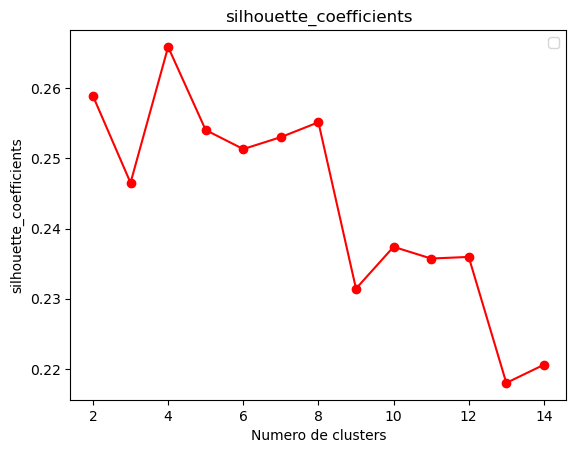

In [491]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

In [304]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

NameError: name 'KneeLocator' is not defined

In [492]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=5,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train)
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)


valor del SSE mas bajo:  24463.839341327417
[[-0.40565122  0.33670986 -0.07759242 -0.24731967  0.27091445 -0.37554504
   1.01673695 -0.39791184  1.24343777 -0.48508249 -0.37324568  0.17546008
  -0.26437079 -0.25253213 -0.1802936   0.32525513  0.36067954]
 [-0.69615296 -1.88692329 -0.30260611 -0.22969605 -0.29334553 -0.33698697
  -0.55405154 -0.41796189 -0.45774538 -0.53036027 -0.3838125  -0.4109116
  -0.169051   -0.27867933 -0.28857701  0.38602349  0.36067954]
 [-0.12475904  0.42479429  0.3702642   0.44374048  0.05999936 -0.3365791
   1.01334141  1.90425567  0.24031525 -0.41582342 -0.33730597  0.5575305
   0.4449253   0.02512151 -0.16075841  0.37461888  0.36067954]
 [ 1.0343094   0.46319348 -0.33830587 -0.25038173 -0.34001426  0.78214343
  -0.72891671 -0.38554055 -0.61759595  1.24816988  0.78421135 -0.42124686
   0.48233554  0.04519754  0.13910118 -0.45230689  0.36067954]
 [-0.16505932  0.4100855  -0.34817568 -0.2352425  -0.39094727 -0.24889925
  -0.79671783 -0.36364861 -0.72096218 -0.

In [347]:
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train, kmeans.labels_))

Inertia:  21259.29915079962
Silhouette Score:  0.26057382310261396
Calinski harabasz score:  1639.1123539359412


In [302]:
#Predecir valores de etiquetas
label = kmeans.fit_predict(train)
label


array([0, 2, 1, ..., 4, 4, 4])

# Reduccion de la dimensionalidad

##  PCA con una varianza explicada del 75%

In [365]:
pca = PCA(n_components=0.75).fit(train)
pca.n_components_

4

In [366]:
pca.explained_variance_ratio_

array([0.34116661, 0.20081562, 0.12435568, 0.09442895])

"bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],\n                  y = PCA_variance['Varianza explicada (%)'],\n                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',\n                  alpha = 0.8)\n\nplt.show()"

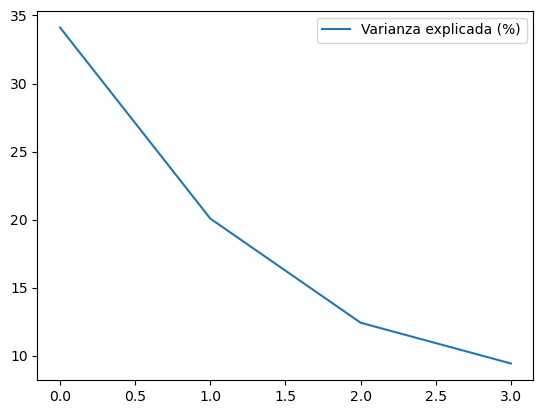

In [367]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance.plot()
#fig, ax = plt.subplots(1, 1, figsize = (7, 5))

"""bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()"""

In [368]:
train_pca=pca.fit_transform(train)

In [369]:
import warnings
# Suprimir las advertencias relacionadas con K-Means
warnings.filterwarnings("ignore", category=FutureWarning)

In [370]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(train_pca)
    inertia_list.append(kmeans.inertia_)

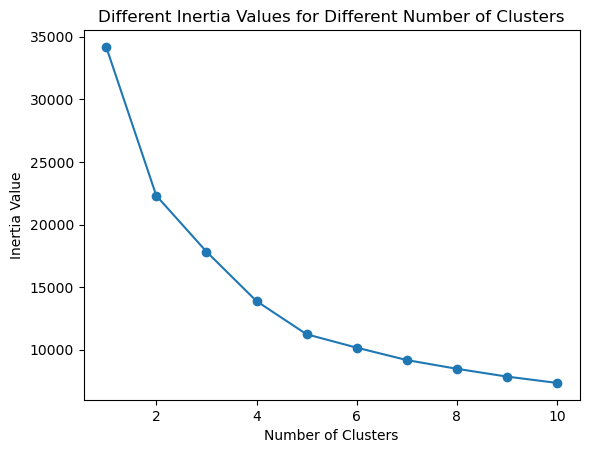

In [371]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [ ]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  score = silhouette_score(train, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

In [372]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=5,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca)
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)

valor del SSE mas bajo:  11236.187667538194
[[ 1.61224211 -0.3109225  -0.94792458  0.15369212]
 [-1.70463291  1.92484453 -0.39841749  0.58313237]
 [-1.15873408 -0.26388874 -0.03922293 -0.55096309]
 [ 1.76423502  1.00208865  1.31545634 -0.45959497]
 [-0.62140796 -1.55839439  0.76886468  1.01172439]]
Numero de iteraciones:  53


In [373]:
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, kmeans.labels_))

Inertia:  11236.187667538194
Silhouette Score:  0.35482955430148516
Calinski harabasz score:  3006.246992185617


### PCA solo 3 factores

In [459]:
pca = PCA(n_components=3).fit(train)
pca.n_components_

3

In [460]:
pca.explained_variance_ratio_

array([0.29314575, 0.177428  , 0.12164507])

"bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],\n                  y = PCA_variance['Varianza explicada (%)'],\n                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',\n                  alpha = 0.8)\n\nplt.show()"

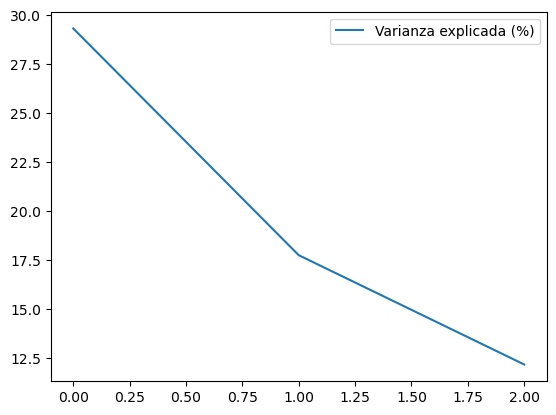

In [461]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance.plot()
#fig, ax = plt.subplots(1, 1, figsize = (7, 5))

"""bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()"""

In [462]:
train_pca=pca.fit_transform(train)

In [463]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(train_pca)
    inertia_list.append(kmeans.inertia_)

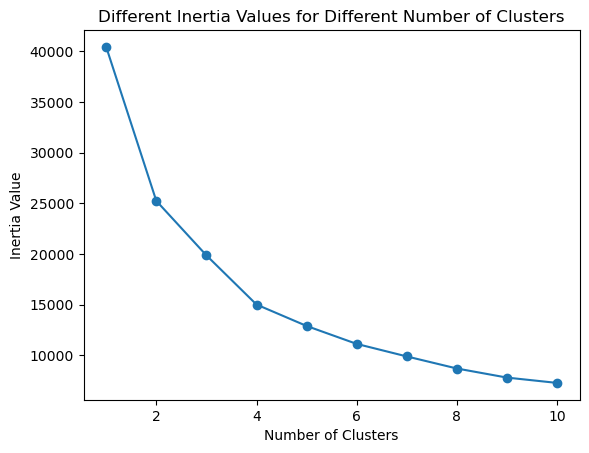

In [464]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [ ]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  score = silhouette_score(train, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

In [465]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca)
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)

valor del SSE mas bajo:  15010.353711232805
[[-6.32031359e-01 -1.24607603e+00  2.74111135e+00]
 [ 1.79634682e+00  3.66837400e-01  2.71480743e-03]
 [-6.15743464e-01 -8.55570210e-01 -7.26237754e-01]
 [-1.63578144e+00  1.07992775e+00  6.39508494e-03]]
Numero de iteraciones:  14


In [466]:
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, kmeans.labels_))

Inertia:  15010.353711232805
Silhouette Score:  0.3511813713047035
Calinski harabasz score:  4173.328680749667


que es df_final en el dataframe de la profesora???

In [467]:
# Predicción de los clusters
cluster = kmeans.fit_predict(train_pca)
train['cluster']= cluster


# A partir de ahora, sólo trabajaremos con "df_final"
train.head(5)

,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,antiguedad,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,2


In [426]:
train_pca

array([[-0.95192686, -1.52900082,  0.0300258 ],
       [-2.17132739,  1.46382588, -0.12133195],
       [ 1.24115686,  1.3881506 ,  2.46052103],
       ...,
       [ 1.86123586, -1.09618095, -1.29299485],
       [ 0.3122197 , -1.19485469, -0.65111623],
       [ 0.33267976, -0.19545401, -0.70656398]])

In [468]:
train_pcaa=train_pca.copy()

In [469]:
train_pcaa=pd.DataFrame(train_pca)
train_pcaa["cluster"]=cluster
train_pcaa

,0,1,2,cluster
0,-0.889087,-1.138819,-0.823142,2
1,-2.100566,1.256234,-0.150774,3
2,1.173744,1.655461,-0.841792,1
3,-1.142053,-0.214600,-1.120960,2
4,-1.054330,-0.544669,-0.837457,2
...,...,...,...,...
7394,1.459097,-1.985173,3.923495,0
7395,0.931671,-1.451201,3.913065,0
7396,0.658752,-2.177036,3.639700,0
7397,-1.686226,-2.303090,3.153772,0


In [470]:
train_pcaf=train_pcaa.values
train_pcaf

array([[-0.88908738, -1.13881927, -0.82314167,  2.        ],
       [-2.10056593,  1.2562337 , -0.15077397,  3.        ],
       [ 1.17374436,  1.65546148, -0.84179166,  1.        ],
       ...,
       [ 0.65875201, -2.17703551,  3.6397004 ,  0.        ],
       [-1.68622642, -2.30308981,  3.15377216,  0.        ],
       [-0.41386278, -0.92160647,  3.47177153,  0.        ]])

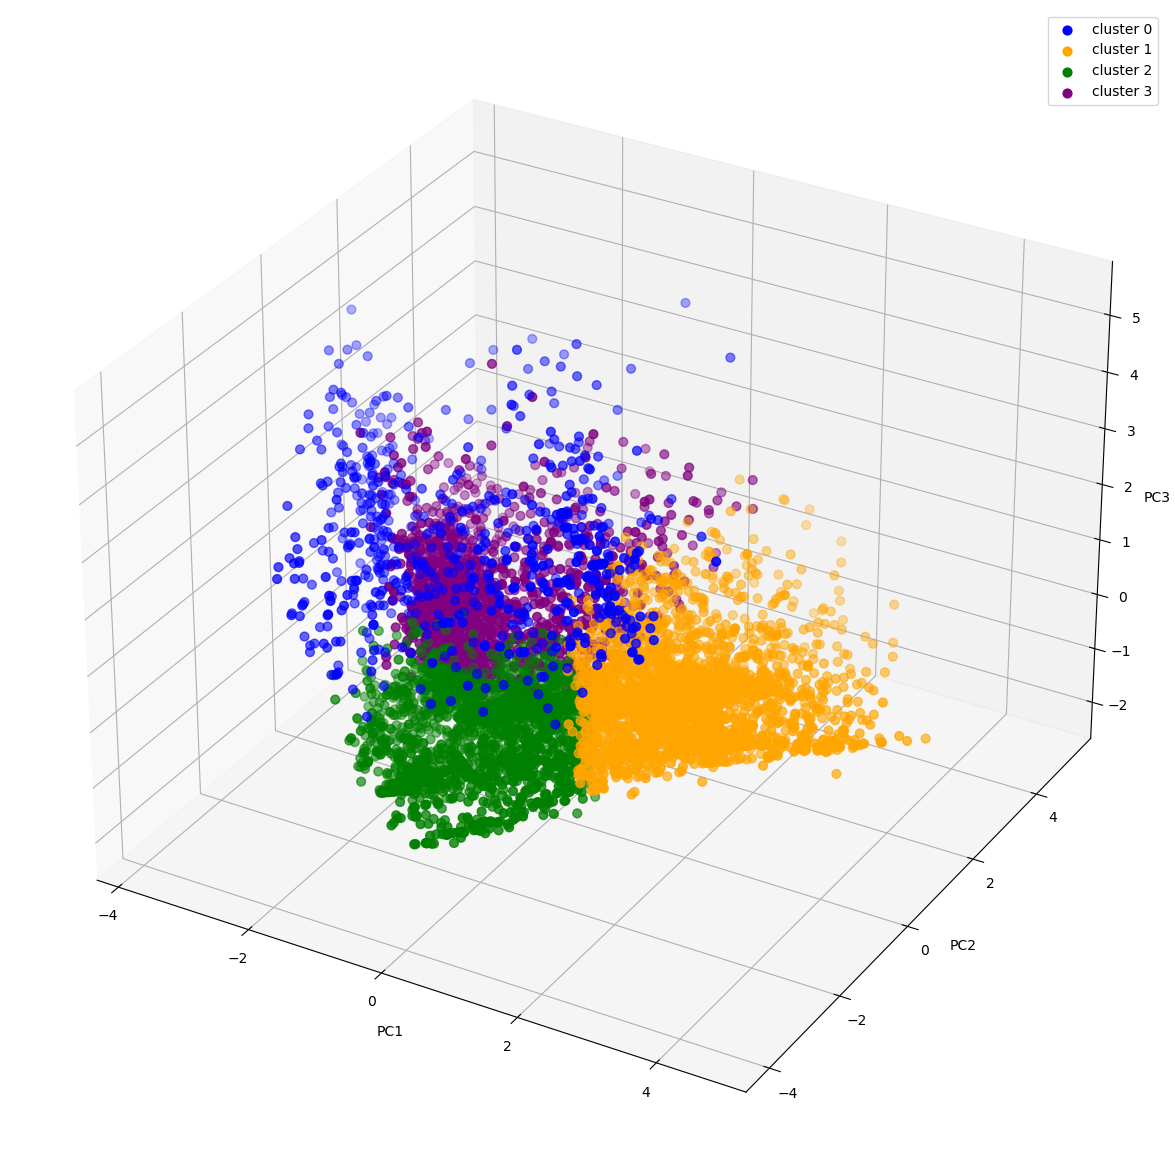

In [471]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca[cluster == 0,0],train_pca[cluster == 0,1],train_pca[cluster == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca[cluster == 1,0],train_pca[cluster == 1,1],train_pca[cluster == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca[cluster == 2,0],train_pca[cluster == 2,1],train_pca[cluster == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca[cluster == 3,0],train_pca[cluster == 3,1],train_pca[cluster == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

jerarquico

In [8]:
# Función de vinculación para agrupar datos según similud
Z = linkage(tabla, method='ward', metric='euclidean')
Z[:100]

array([[5.21900000e+03, 8.44200000e+03, 4.84679340e+00, 2.00000000e+00],
       [1.13100000e+03, 5.92800000e+03, 5.17391107e+00, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.98212337e+00, 2.00000000e+00],
       [4.18500000e+03, 7.36600000e+03, 1.13095917e+01, 2.00000000e+00],
       [4.62900000e+03, 7.91900000e+03, 1.18228254e+01, 2.00000000e+00],
       [8.60300000e+03, 8.64000000e+03, 1.25061920e+01, 2.00000000e+00],
       [1.23500000e+03, 6.98500000e+03, 1.32381056e+01, 2.00000000e+00],
       [6.79600000e+03, 7.39100000e+03, 1.33883214e+01, 2.00000000e+00],
       [8.73300000e+03, 8.88800000e+03, 1.35405921e+01, 2.00000000e+00],
       [8.62100000e+03, 8.64100000e+03, 1.36841595e+01, 2.00000000e+00],
       [2.32000000e+03, 2.86100000e+03, 1.39968875e+01, 2.00000000e+00],
       [3.94300000e+03, 6.09500000e+03, 1.41794774e+01, 2.00000000e+00],
       [8.69500000e+03, 8.87700000e+03, 1.43030671e+01, 2.00000000e+00],
       [2.47000000e+02, 8.06800000e+03, 1.47571366e

In [333]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(train_pca)
    inertia_list.append(kmeans.inertia_)

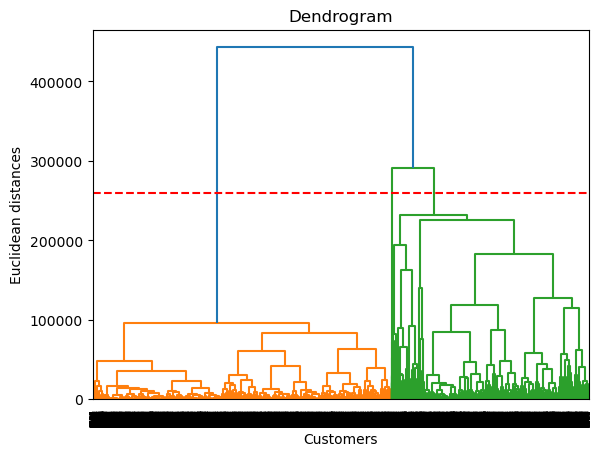

In [10]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(tabla, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=260000, color='red', linestyle='--')
plt.show()


In [91]:
# Dibujo del dendograma
labelList = list(tabla1['id'])
print(labelList)
plt.figure(figsize=(100, 100))
dendrogram(Z,orientation='right',labels=labelList, distance_sort='descending',show_leaf_counts=False,leaf_font_size=16)
plt.show()

['C10001', 'C10002', 'C10003', 'C10004', 'C10005', 'C10006', 'C10007', 'C10008', 'C10009', 'C10010', 'C10011', 'C10012', 'C10013', 'C10014', 'C10015', 'C10016', 'C10017', 'C10018', 'C10019', 'C10020', 'C10021', 'C10022', 'C10023', 'C10024', 'C10025', 'C10026', 'C10027', 'C10028', 'C10029', 'C10030', 'C10031', 'C10032', 'C10033', 'C10034', 'C10035', 'C10036', 'C10037', 'C10038', 'C10039', 'C10040', 'C10041', 'C10043', 'C10044', 'C10045', 'C10046', 'C10047', 'C10048', 'C10049', 'C10050', 'C10051', 'C10052', 'C10053', 'C10054', 'C10055', 'C10056', 'C10057', 'C10058', 'C10059', 'C10060', 'C10061', 'C10062', 'C10063', 'C10064', 'C10065', 'C10067', 'C10068', 'C10069', 'C10070', 'C10071', 'C10072', 'C10073', 'C10074', 'C10075', 'C10077', 'C10078', 'C10079', 'C10080', 'C10081', 'C10082', 'C10083', 'C10084', 'C10085', 'C10086', 'C10087', 'C10088', 'C10089', 'C10090', 'C10092', 'C10093', 'C10094', 'C10095', 'C10096', 'C10097', 'C10098', 'C10099', 'C10100', 'C10101', 'C10102', 'C10103', 'C10104',

TypeError: 'dict' object is not callable

<Figure size 10000x10000 with 0 Axes>

In [ ]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()